# Covid-19 infection in Portugal
Mathematical models base on: [Covid-19 infection in Italy](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d)

# Data

In [420]:
data = {
    'start' : '2020/03/02',
    'cases' : [
        2,
        4,
        6,
        9,
        13,
        21,
        30,
        39,
        41,
        59,
        78,
        112,
        169,
        245,
        331,
        448,
        642,
        785,
        1020,
        1280,
        1600,
        2060,
        2362,
        2995,
        3544,
        4268
    ]
}

# Models

In [421]:
from numpy import exp

# exponetial function
def exponential_model(x, a, b, c):
    return a * exp( b * (x - c))

# logistic function
def logistic_model(x, a, b, c):
    return c / (1 + exp(-(x - b) / a))

# Regression 

In [422]:
from scipy.optimize import curve_fit, fsolve
# prepare data
y_past = data['cases']
x_past = range(len(y))

# exponential fit
exponent_fit = curve_fit(exponential_model, x_past, y_past)
# exponential parameters
exp_a = exponent_fit[0][0]
exp_b = exponent_fit[0][1]
exp_c = exponent_fit[0][2]
# logistic fit
logistic_fit = curve_fit(logistic_model, x_past, y_past)
# logistic parameters
log_a = logistic_fit[0][0]
log_b = logistic_fit[0][1]
log_c = logistic_fit[0][2]

# logistic end day
end = int(fsolve(lambda x : logistic_model(x, log_a, log_b, log_c) - int(log_c), log_b))

# Results

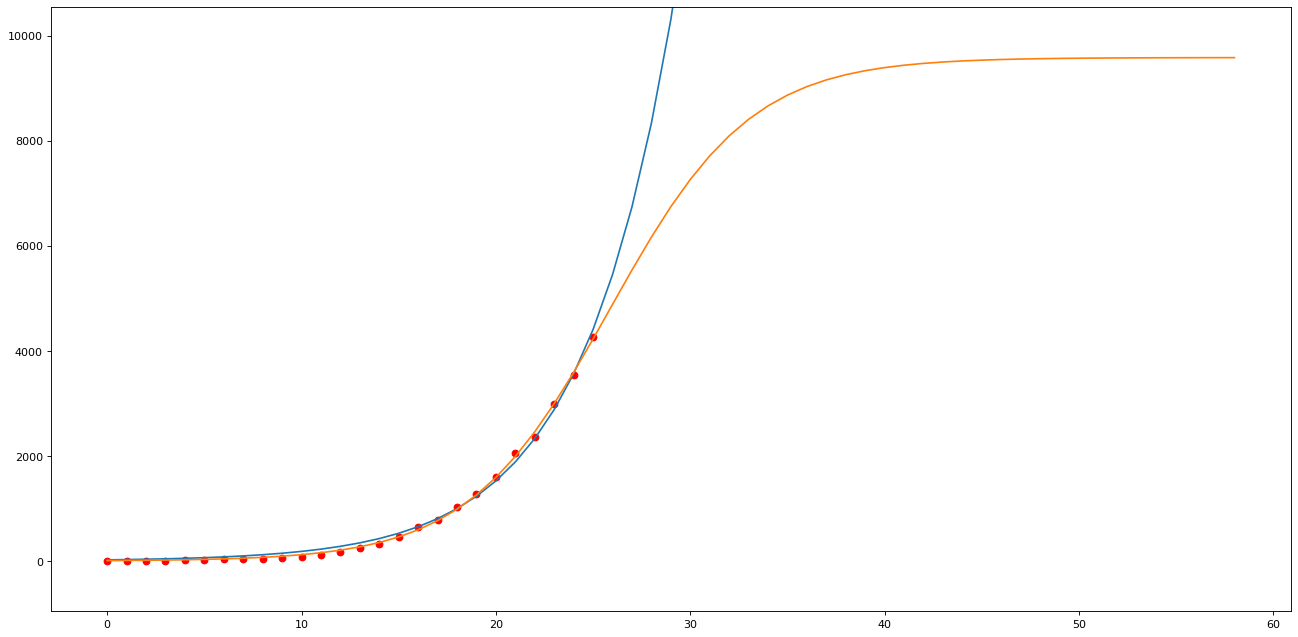

In [423]:
import matplotlib.pyplot as plt

# figure
plt.figure('graph', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

# Limits
pad = 0.1 * log_c
plt.ylim((min(y) - pad, log_c + pad))

# Real data
plt.scatter(x_past, y_past, label="Real data", color="red")

# Total range
x_total = range(end) 

# Predicted exponetial curve
plt.plot(x_total, [exponential_model(i, exp_a, exp_b, exp_c) for i in x_total], label="Exponential model")

# Predicted logistic curve
plt.plot(x_total, [logistic_model(i, log_a, log_b, log_c) for i in x_total], label="Logistic model")

# show
plt.show()

In [424]:
from IPython.display import Markdown, display
from datetime        import datetime, date, timedelta
# start date
start_date = datetime.strptime(data['start'], '%Y/%m/%d').date()
# forcast
display(Markdown(f'# Forecast'))
for x in range(max(x_past) + 1, end)[:5]:
    date  = start_date + timedelta(days=x)
    cases = logistic_model(x, log_a, log_b, log_c)
    display(Markdown(f'- **{int(cases)}** cases on {date.strftime("%A, %d %B %Y")}'))

# conclusion
date  = start_date + timedelta(days=end)
cases = logistic_model(end, log_a, log_b, log_c)
display(Markdown(f'## End of epidemic in **{date}** with **{int(cases)}** cases!'))

# Forecast

- **4882** cases on Saturday, 28 March 2020

- **5536** cases on Sunday, 29 March 2020

- **6162** cases on Monday, 30 March 2020

- **6741** cases on Tuesday, 31 March 2020

- **7259** cases on Wednesday, 01 April 2020

## End of epidemic in **2020-04-30** with **9579** cases!